* [Бутстреп и А/Б тестирование](https://habr.com/ru/companies/X5Tech/articles/679842/)
* [Как определить размер выборки для бутстрэпа старым дедовским способом](https://habr.com/ru/amp/publications/707816/)

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [105]:
def get_bootstrap(data_one, data_two, boot_it=1000, statistic=np.mean, conf_level=0.95):
    '''
    Функция для проверки гипотез с помощью бутстрапа
    
        Параметры
        ---------        
            data_one: числовые значения первой выборки
            data_two: числовые значения второй выборки
            boot_it : количество бутстрэп-подвыборок
            statistic : интересующая нас статистика
            conf_level : уровень значимости
            
        Возвращает
        ----------
            p_value: p-value                        
    '''
    
    
    boot_len = max(len(data_1), len(data_2))    
    boot_data = []
    for _ in range(boot_it):
        sample_data_one = np.random.choice(a=data_one, size=boot_len, replace=True)
        sample_data_two = np.random.choice(a=data_two, size=boot_len, replace=True)
        boot_data.append(statistic(sample_data_one) - statistic(sample_data_two))

    left_quant = (1 - conf_level) / 2
    right_quant = 1 - (1 - conf_level) / 2
    ci = np.quantile(boot_data, [left_quant, right_quant]) 
    p_1 = norm.cdf(x=0, loc=np.mean(boot_data), scale=np.std(boot_data))
    p_2 = norm.cdf(x=0, loc=-np.mean(boot_data), scale=np.std(boot_data))
    p_value = min(p_1, p_2) * 2 

    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=boot_data, color='r')
    plt.vlines(ci, ymin=0, ymax=100, linestyle='--', color='b')
    plt.xlabel('Разница статистик в группах')
    plt.ylabel('Частота')
    plt.title("")
    plt.show()
    
    return p_value

In [106]:
a = np.random.normal(loc=10, scale=2, size = 1000)
b = np.random.normal(loc=10.5, scale=2, size = 1000)

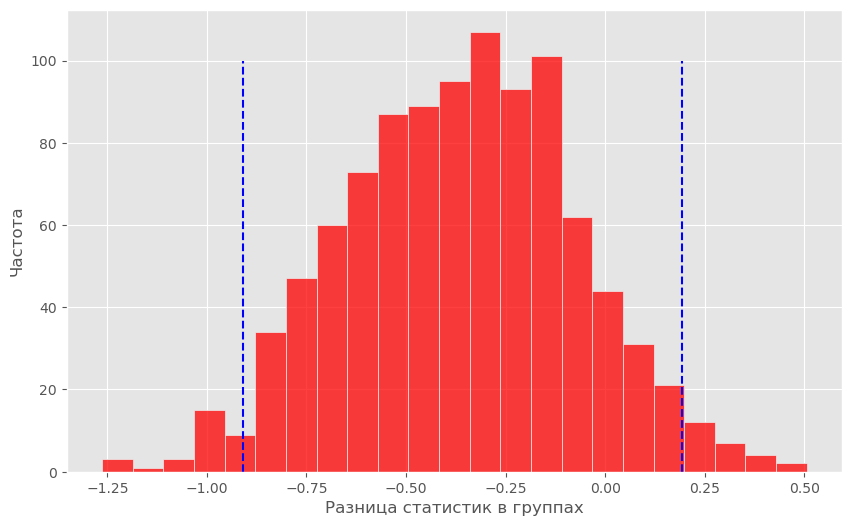

0.20870643532092792

In [107]:
get_bootstrap(a, b)